In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CC_data.csv to CC_data (2).csv


In [ ]:
# Read the data file
CC_data = pd.read_csv("CC_data.csv")
#CC_data.info()

In [ ]:
CC_data.head(100)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.500,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,a,28.58,3.540,u,g,i,bb,0.500,t,f,0,t,g,171,0,-
96,b,23,0.625,y,p,aa,v,0.125,t,f,0,f,g,180,1,-
97,b,?,0.500,u,g,c,bb,0.835,t,f,0,t,s,320,0,-
98,a,22.5,11.000,y,p,q,v,3.000,t,f,0,t,g,268,0,-


In [ ]:
#describe() is used to view some basic statistical details like percentile, mean, std etc.
CC_data.describe()

,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [ ]:
# Replace "?" with NaN for missing values
# When inplace=False is used, it performs operation on data and returns a new copy of data.It has to be stored in some dataframe
# When inplace = True is used, it performs operation on data and nothing is returned.

CC_data.replace('?', np.NaN, inplace = True)
CC_data["Age"] = pd.to_numeric(CC_data["Age"])
CC_data2 = CC_data.copy()
CC_data.fillna(CC_data.mean(), inplace=True)
#print(CC_data["Age"].dtype)
#print(CC_data["EducationLevel"].dtype)
CC_data.head(100)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.830000,0.000,u,g,w,v,1.250,t,t,1,f,g,202,0,+
1,a,58.670000,4.460,u,g,q,h,3.040,t,t,6,f,g,43,560,+
2,a,24.500000,0.500,u,g,q,h,1.500,t,f,0,f,g,280,824,+
3,b,27.830000,1.540,u,g,w,v,3.750,t,t,5,t,g,100,3,+
4,b,20.170000,5.625,u,g,w,v,1.710,t,f,0,f,s,120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,a,28.580000,3.540,u,g,i,bb,0.500,t,f,0,t,g,171,0,-
96,b,23.000000,0.625,y,p,aa,v,0.125,t,f,0,f,g,180,1,-
97,b,31.568171,0.500,u,g,c,bb,0.835,t,f,0,t,s,320,0,-
98,a,22.500000,11.000,y,p,q,v,3.000,t,f,0,t,g,268,0,-


# Data Visualisation

Male


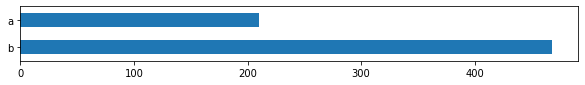

Age


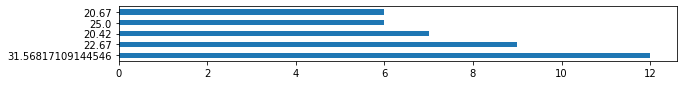

Debt


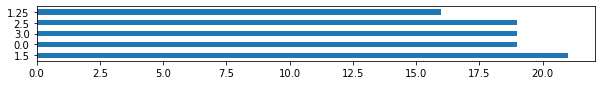

Married


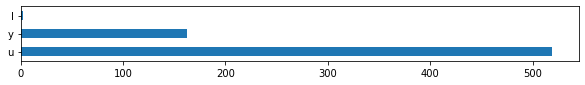

BankCustomer


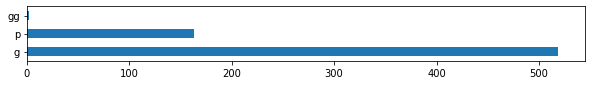

EducationLevel


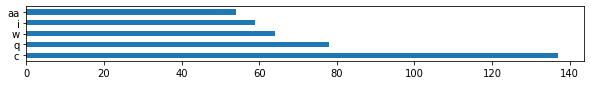

Ethnicity


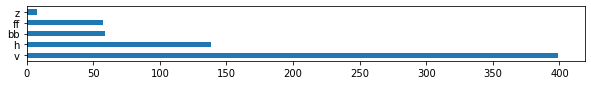

YearsEmployed


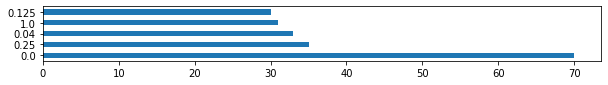

PriorDefault


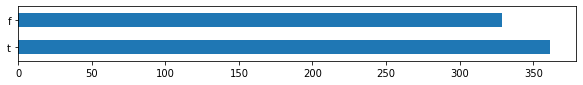

Employed


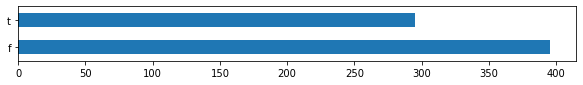

CreditScore


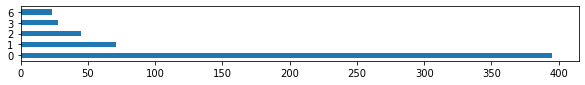

DriversLicense


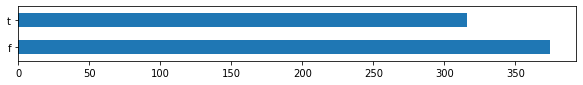

Citizen


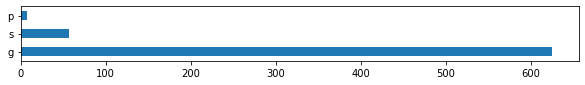

ZipCode


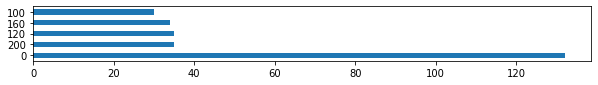

Income


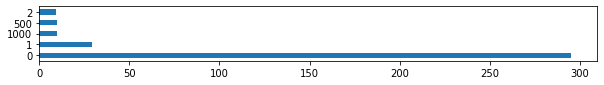

Approved


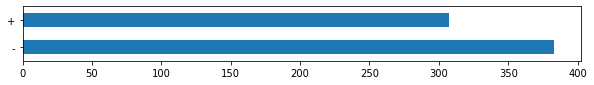

In [ ]:
#Bar plot visualization
for i in CC_data.columns:
    plt.figure(figsize=(10,1))
    CC_data[i].value_counts().head().plot(kind='barh')
    print(i)
    plt.show()

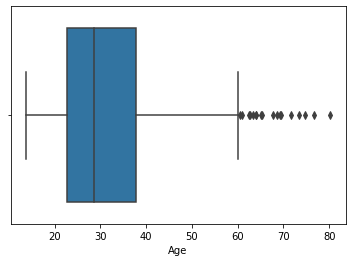

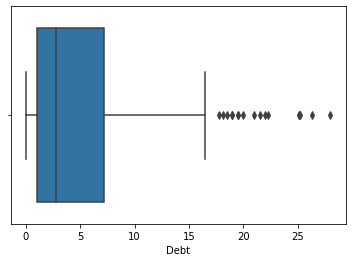

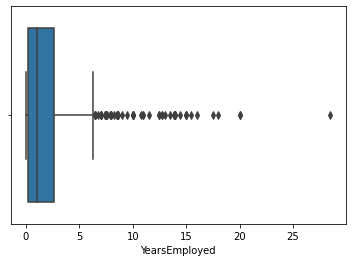

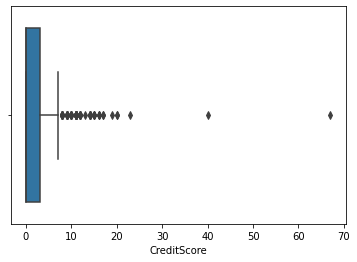

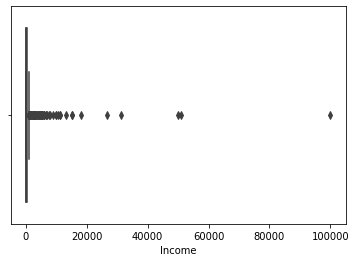

In [ ]:
# Box plot visuaization
for i in CC_data.columns:
    if CC_data[i].dtype!='O':
        sns.boxplot(x=CC_data[i])
        plt.show()

In [ ]:
#correlation matrix can only be done for numerical variables not for categorical variables.
corrmat = CC_data.corr()
corrmat

,Age,Debt,YearsEmployed,CreditScore,Income
Age,1.000000,0.201316,0.392787,0.185575,0.018539
Debt,0.201316,1.000000,0.298902,0.271207,0.123121
YearsEmployed,0.392787,0.298902,1.000000,0.322330,0.051345
CreditScore,0.185575,0.271207,0.322330,1.000000,0.063692
Income,0.018539,0.123121,0.051345,0.063692,1.000000


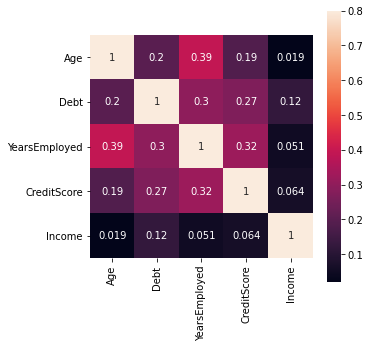

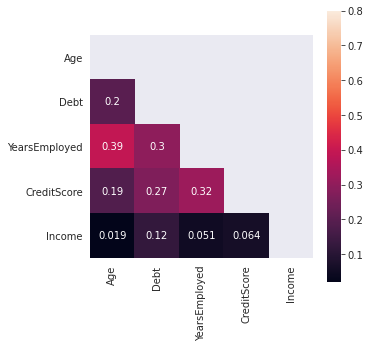

In [ ]:
#seaborn heatMap for correlation Matrix
def heatMap(x,y):
    f, ax = plt.subplots(figsize=(x, y))
    sns.heatmap(corrmat,annot=True, vmax=.8,square=True);
    #only lower half of matrix
    mask = np.zeros_like(corrmat)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("dark"):
        f, ax = plt.subplots(figsize=(x, y))
        ax = sns.heatmap(corrmat, mask=mask,annot=True, vmax=.8, square=True)

heatMap(5,5)

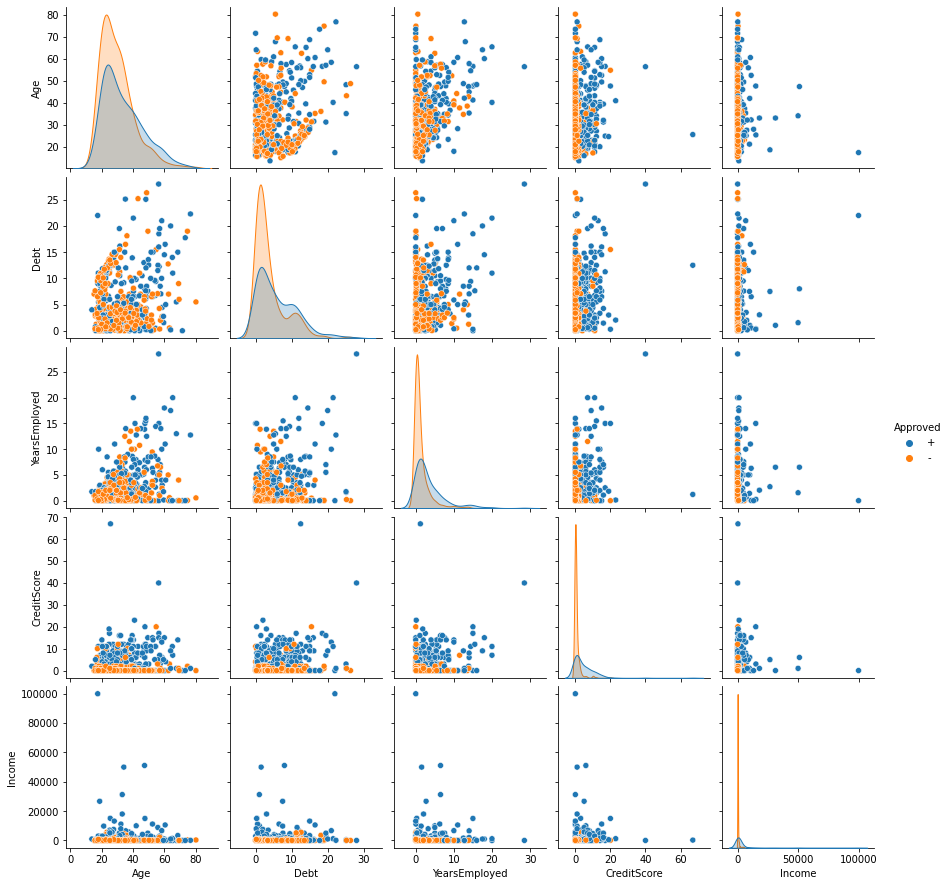

In [ ]:
#scatter plot
sns.pairplot(CC_data,hue='Approved')
plt.show()


# Data Preprocessing

In [ ]:
# Going through each columns and checking the type is object
    #if it is object, replace it with most frequent value
def ReplaceWithMode(dframe):
    for col in dframe:
        if dframe[col].dtype == 'object':
            dframe[col] = dframe[col].fillna(dframe[col].mode().iloc[0])
            
ReplaceWithMode(CC_data)
CC_data.head(100)


,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.830000,0.000,u,g,w,v,1.250,t,t,1,f,g,202,0,+
1,a,58.670000,4.460,u,g,q,h,3.040,t,t,6,f,g,43,560,+
2,a,24.500000,0.500,u,g,q,h,1.500,t,f,0,f,g,280,824,+
3,b,27.830000,1.540,u,g,w,v,3.750,t,t,5,t,g,100,3,+
4,b,20.170000,5.625,u,g,w,v,1.710,t,f,0,f,s,120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,a,28.580000,3.540,u,g,i,bb,0.500,t,f,0,t,g,171,0,-
96,b,23.000000,0.625,y,p,aa,v,0.125,t,f,0,f,g,180,1,-
97,b,31.568171,0.500,u,g,c,bb,0.835,t,f,0,t,s,320,0,-
98,a,22.500000,11.000,y,p,q,v,3.000,t,f,0,t,g,268,0,-


In [ ]:
lblenc=LabelEncoder()
# Iterate over all the values of each column and extract their dtypes
# Compare if the dtype is object
# Use LabelEncoder to do the numeric transformation

for col in CC_data:
    if CC_data[col].dtype=='object':
         CC_data[col]=lblenc.fit_transform(CC_data[col].astype(str))



#print(CC_data["Age"].dtype)
#print(CC_data["EducationLevel"].dtype)
corrmat=CC_data.corr()
corrmat

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
Male,1.000000,0.035604,-0.041746,0.073291,0.069792,-0.017139,0.053600,0.086544,-0.026047,-0.077784,-0.024630,0.051674,0.085488,0.029244,-0.002063,0.028934
Age,0.035604,1.000000,0.201316,-0.089504,-0.102450,0.011876,-0.170441,0.392787,0.204342,0.083681,0.185575,0.054778,-0.014584,-0.095700,0.018539,-0.161627
Debt,-0.041746,0.201316,1.000000,-0.091526,-0.079364,0.023373,-0.047534,0.298902,0.244317,0.174846,0.271207,-0.013023,-0.122233,-0.097845,0.123121,-0.206294
Married,0.073291,-0.089504,-0.091526,1.000000,0.982257,-0.049977,-0.025360,-0.080624,-0.129863,-0.162464,-0.106457,-0.004964,-0.045169,-0.051509,-0.120065,0.194306
BankCustomer,0.069792,-0.102450,-0.079364,0.982257,1.000000,-0.055812,-0.030136,-0.073064,-0.142094,-0.173199,-0.112750,0.006113,-0.021402,-0.042691,-0.025170,0.185134
EducationLevel,-0.017139,0.011876,0.023373,-0.049977,-0.055812,1.000000,-0.000607,0.037001,0.109642,0.128549,0.006978,0.074210,-0.010455,0.093151,0.004808,-0.130434
Ethnicity,0.053600,-0.170441,-0.047534,-0.025360,-0.030136,-0.000607,1.000000,-0.103549,-0.036520,-0.002420,-0.036518,-0.008281,0.036243,-0.018713,-0.017261,-0.000866
YearsEmployed,0.086544,0.392787,0.298902,-0.080624,-0.073064,0.037001,-0.103549,1.000000,0.345689,0.222982,0.322330,0.138139,-0.020528,-0.025618,0.051345,-0.322475
PriorDefault,-0.026047,0.204342,0.244317,-0.129863,-0.142094,0.109642,-0.036520,0.345689,1.000000,0.432032,0.379532,0.091276,-0.113623,0.073481,0.090012,-0.720407
Employed,-0.077784,0.083681,0.174846,-0.162464,-0.173199,0.128549,-0.002420,0.222982,0.432032,1.000000,0.571498,0.017043,-0.242568,0.084841,0.077652,-0.458301


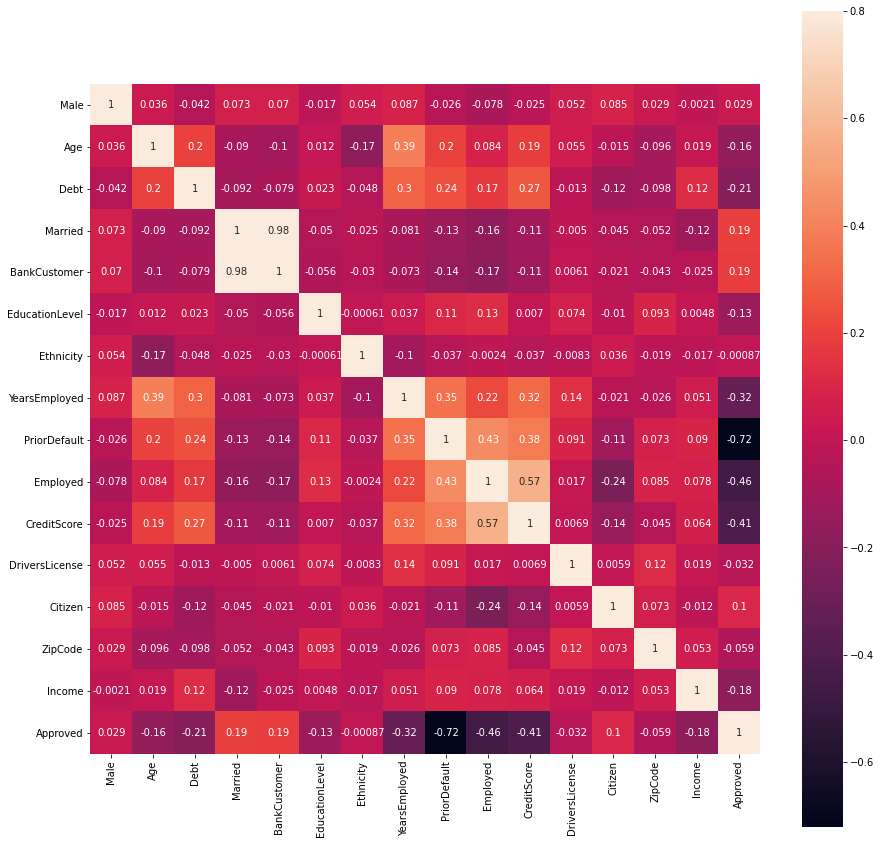

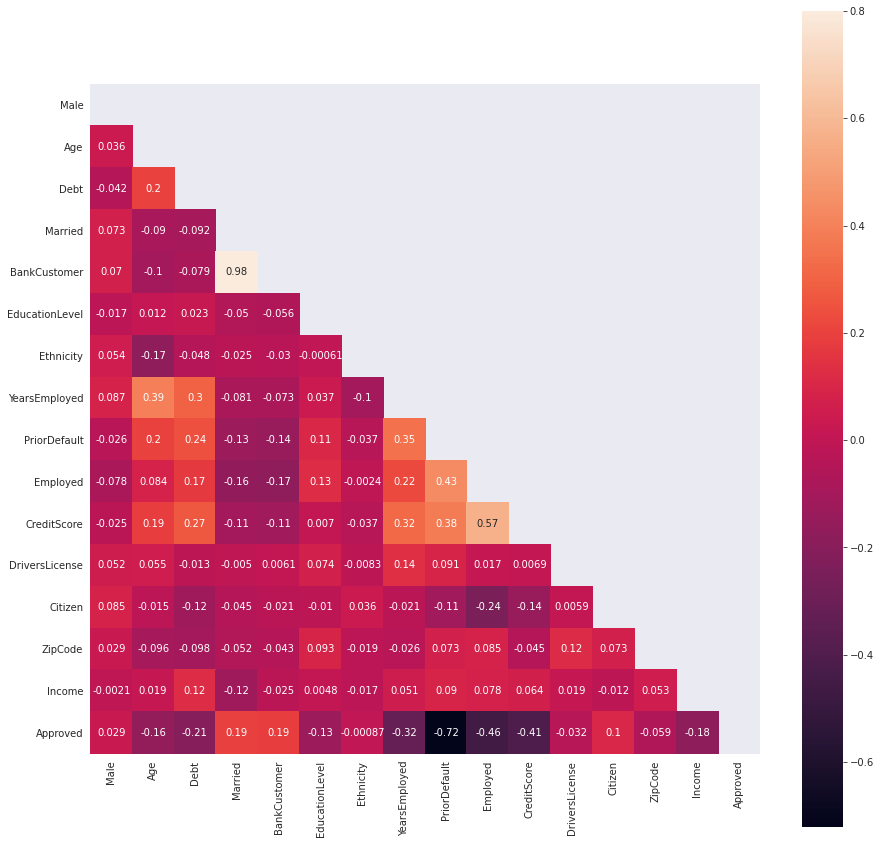

In [ ]:
heatMap(15,15)

In [ ]:
from sklearn.model_selection import train_test_split
CC_data = CC_data.drop(['DriversLicense', 'ZipCode'], axis=1)
CC_data = CC_data.values


In [ ]:
X,Y = CC_data[:,0:13] , CC_data[:,13]

# Spliting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33, random_state=42)

In [ ]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Scaling X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

In [ ]:
rescaledX = scaler.transform(X)

In [ ]:
def featureName(i):
    switcher = { 
        15: "Approved", 
        14: "Income", 
        13: "ZipCode",
        12:"Citizen",
        11:"DriverLicense",
        10:"Creditscore",
        9:"Employed",
        8:"PriorDefault",
        7:"YearsEmployed",
        6:"Ethnicity",
        5:"EducationLevel",
        4:"BankCustomer",
        3:"Married",
        2:"Debt",
        1:"Age",
        0:"Male"
    }
    return switcher.get(i,"None")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


rf = RandomForestClassifier(n_estimators=500)
rf.fit(rescaledX_train, Y_train)
Y_pred = rf.predict(rescaledX_test)
print("Random Forest classifier has accuracy of: ", rf.score(rescaledX_test, Y_test))
# Evaluate the confusion_matrix
confusion_matrix(Y_test, Y_pred)

Random Forest classifier has accuracy of:  0.868421052631579


array([[ 90,  13],
       [ 17, 108]])

Feature rankings:
1. feature PriorDefault (0.303331)
2. feature YearsEmployed (0.117012)
3. feature Debt (0.099515)
4. feature Creditscore (0.097848)
5. feature Age (0.091095)
6. feature Citizen (0.088907)
7. feature EducationLevel (0.060818)
8. feature Employed (0.058526)
9. feature Ethnicity (0.030495)
10. feature Male (0.015262)
11. feature DriverLicense (0.012704)
12. feature Married (0.012657)
13. feature BankCustomer (0.011829)


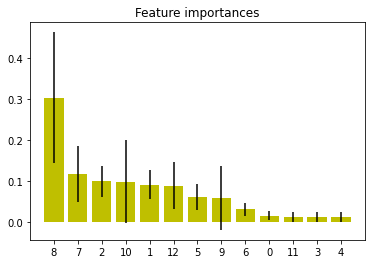


we can see that  PriorDefault is the most important feature, followed by Credit Score and Employment status according to the Random Forest Classifier.


In [ ]:
importances = rf.feature_importances_

std = np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature rankings:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, featureName(indices[f]), importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="y", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

print("\nwe can see that  PriorDefault is the most important feature, followed by Credit Score and Employment status according to the Random Forest Classifier.")

## **which feature has played most important role in decision ?**

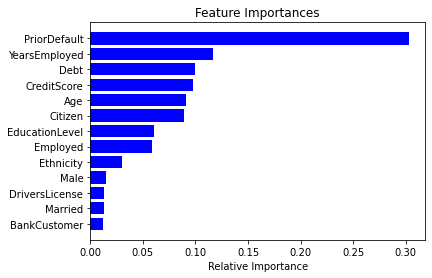

In [ ]:
CC_data2 = CC_data2.drop(['Approved'], axis=1)

features = CC_data2.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:

Y_pred = logreg.predict(X_test)

# Get the accuracy score of logreg model 

print("Accuracy of logistic regression classifier: ",logreg.score(X_test,Y_test))

# Print the confusion matrix of the logreg model

print(confusion_matrix(Y_test,Y_pred))

Accuracy of logistic regression classifier:  0.8289473684210527
[[ 82  21]
 [ 18 107]]


# **Improve Model performance using Grid Search technique**

we have achieved an accuracy score of almost 84% using logistic regression. But can we improve it..?

Yes, we try to improve the performance of our model with GridSearch.
GridSearch is a way to parameter tune that builds out and evaluates a model for 
each combination of the algorithm specified within the parameters. Sklearn’s implementation of logistic regression consists of different hyperparameters, but we will grid search over the following two: tol and max_iter.



In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)
print(param_grid)



{'tol': [0.01, 0.001, 0.0001], 'max_iter': [100, 150, 200]}


In [ ]:

# Instantiate GridSearchCV with the required parameters

grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaledX

rescaledX = scaler.fit_transform(X)

# Fit data to grid_model

grid_model_result = grid_model.fit(rescaledX, Y)

# Summarize results
best_score, best_params = (grid_model_result.best_score_, grid_model_result.best_params_)
print("Best: %f using %s" % (best_score, grid_model_result.best_params_))

Best: 0.850725 using {'max_iter': 100, 'tol': 0.01}
